In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("dataseries_GVC2007_2023.xlsx", sheet_name="Data")
df

,id,year,ctry_id,country,Country,income,eu,asean,Forward_GVC,Backward_GVC,Forward_DVAD,Backward_DVAD,country_s,dum_country_s_oecd,dum_country_s_asean
0,1,2007,1,AUS,AUS,high,0,0,0.140120,0.092434,0.827569,0.870902,AUS,1,0
1,2,2008,1,AUS,AUS,high,0,0,0.162556,0.096948,0.806983,0.865069,AUS,1,0
2,3,2009,1,AUS,AUS,high,0,0,0.154743,0.087889,0.815449,0.875827,AUS,1,0
3,4,2010,1,AUS,AUS,high,0,0,0.165886,0.086856,0.805796,0.880111,AUS,1,0
4,5,2011,1,AUS,AUS,high,0,0,0.166880,0.092925,0.806228,0.874912,AUS,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,2019,62,HKG,HKG,high,0,0,0.188802,0.141359,0.670874,0.728413,HKG,0,0
1050,1051,2020,62,HKG,HKG,high,0,0,0.160292,0.127263,0.714576,0.759985,HKG,0,0
1051,1052,2021,62,HKG,HKG,high,0,0,0.177116,0.139280,0.684123,0.734863,HKG,0,0
1052,1053,2022,62,HKG,HKG,high,0,0,0.172710,0.135489,0.687219,0.729333,HKG,0,0


In [6]:
# OECD국가와 Non-OECD국가 분리
oecd = df[df["dum_country_s_oecd"] == 1]
non_oecd = df[df["dum_country_s_oecd"] == 0]

## GVC Participation

In [25]:
oecd_gvc = oecd.groupby("year")[["Forward_GVC", "Backward_GVC"]].mean()          # OECD그룹에서 year로 groupby 후 GVC 평균 계산        
non_oecd_gvc = non_oecd.groupby("year")[["Forward_GVC", "Backward_GVC"]].mean()  # Non-OECD그룹에서 year로 groupby 후 GVC 평균 계산
gvc = pd.merge(oecd_gvc, non_oecd_gvc, how="outer", on="year")  # 조인
gvc = gvc.rename(  # 컬럼명 변경
    columns={
        "Forward_GVC_x": "Forward GVC OECD",
        "Backward_GVC_x": "Backward GVC OECD",
        "Forward_GVC_y": "Forward GVC Non-OECD",
        "Backward_GVC_y": "Backward GVC Non-OECD",
    }
)

gvc

,Forward GVC OECD,Backward GVC OECD,Forward GVC Non-OECD,Backward GVC Non-OECD
year,,,,
2007,0.193710,0.177969,0.200812,0.168111
2008,0.200750,0.184309,0.207170,0.176215
2009,0.189392,0.170206,0.195159,0.159481
2010,0.203528,0.184098,0.196736,0.167310
2011,0.213116,0.195286,0.204593,0.171678
2012,0.217949,0.196952,0.201126,0.172109
2013,0.219486,0.196357,0.204528,0.173005
2014,0.222517,0.196460,0.208314,0.171966
2015,0.226933,0.202642,0.201584,0.171125


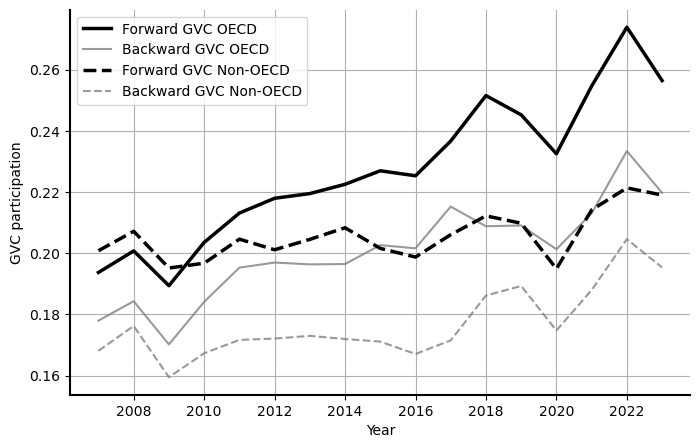

In [69]:
plt.figure(figsize=(8, 5))  # 그래프 크기 설정

# OECD
plt.plot(
    gvc.index,                    # x축 데이터
    gvc["Forward GVC OECD"],      # y축 데이터
    label="Forward GVC OECD",     # 범례에 표시될 이름
    color="black",                # 선 색상
    linestyle="-",                # 선 스타일
    linewidth=2.5,                # 선 굵기
    alpha=1.0                     # 투명도
)
plt.plot(
    gvc.index, 
    gvc["Backward GVC OECD"], 
    label="Backward GVC OECD",
    color="gray", 
    linestyle="-", 
    linewidth=1.5, 
    alpha=0.8
)

# Non-OECD
plt.plot(
    gvc.index, 
    gvc["Forward GVC Non-OECD"], 
    label="Forward GVC Non-OECD",
    color="black", 
    linestyle="--", 
    linewidth=2.5, 
    alpha=1.0
)
plt.plot(
    gvc.index, 
    gvc["Backward GVC Non-OECD"], 
    label="Backward GVC Non-OECD",
    color="gray",
    linestyle="--", 
    linewidth=1.5, 
    alpha=0.8
)

plt.xlabel("Year", fontsize=10)               # X축 이름 설정
plt.ylabel("GVC participation", fontsize=10)  # Y축 이름 설정
plt.grid()    # 격자 표시 
plt.legend()  # 범례 표시

# X축과 Y축만 표시
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# X축과 Y축 크기 설정
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.savefig("GVC_participation.png", dpi=300)  # 파일 저장 (고해상도)

plt.show()

## DVAD Participation

In [62]:
oecd_dvad = oecd.groupby("year")[["Forward_DVAD", "Backward_DVAD"]].mean()
non_oecd_dvad = non_oecd.groupby("year")[["Forward_DVAD", "Backward_DVAD"]].mean()
dvad = pd.merge(oecd_dvad, non_oecd_dvad, how="outer", on="year")
dvad = dvad.rename(
    columns={
        "Forward_DVAD_x": "Forward DVAD OECD",
        "Backward_DVAD_x": "Backward DVAD OECD",
        "Forward_DVAD_y": "Forward DVAD Non-OECD",
        "Backward_DVAD_y": "Backward DVAD Non-OECD",
    }
)

dvad

,Forward DVAD OECD,Backward DVAD OECD,Forward DVAD Non-OECD,Backward DVAD Non-OECD
year,,,,
2007,0.691272,-3.917792e+08,0.701537,-1.953242e+10
2008,0.687900,6.693128e-01,0.699452,1.586911e+00
2009,0.700659,-1.054426e+10,0.714941,6.834608e-01
2010,0.682562,-2.037032e+10,0.707016,6.937142e-01
2011,0.669673,5.866398e-01,0.696777,6.811516e-01
2012,0.662814,6.325132e-01,0.701123,5.245145e-01
2013,0.661531,5.752468e-01,0.700792,3.461449e+00
2014,0.656332,6.558357e-01,0.692204,7.074203e-01
2015,0.646631,6.573237e-01,0.696252,7.110689e-01


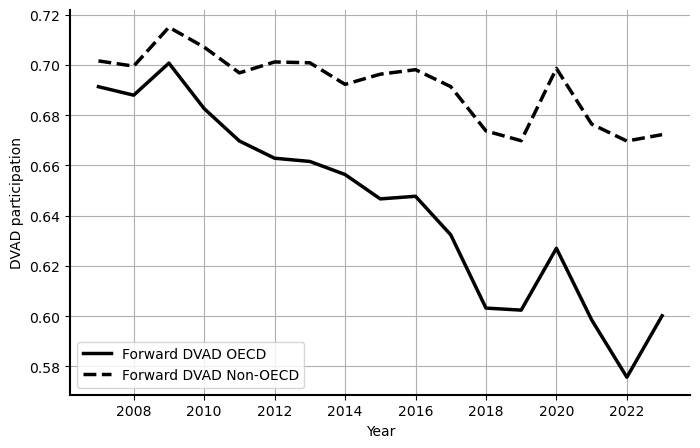

In [73]:
plt.figure(figsize=(8, 5))

# OECD
plt.plot(
    dvad.index, 
    dvad['Forward DVAD OECD'], 
    label='Forward DVAD OECD',
    color='black', 
    linestyle='-', 
    linewidth=2.5, 
    alpha=1.0
)
# plt.plot(
#     dvad.index, 
#     dvad['Backward DVAD OECD'], 
#     label='Backward DVAD OECD',
#     color='gray', 
#     linestyle='-', 
#     linewidth=1.5, 
#     alpha=0.8
# )

# Non-OECD
plt.plot(
    dvad.index, 
    dvad['Forward DVAD Non-OECD'], 
    label='Forward DVAD Non-OECD',
    color='black', 
    linestyle='--', 
    linewidth=2.5, 
    alpha=1.0
)
# plt.plot(
#     dvad.index, 
#     dvad['Backward DVAD Non-OECD'], 
#     label='Backward DVAD Non-OECD',
#     color='gray',
#     linestyle='--', 
#     linewidth=1.5, 
#     alpha=0.8
# )

plt.xlabel("Year", fontsize=10)
plt.ylabel("DVAD participation", fontsize=10)
plt.grid()
plt.legend(loc="lower left")

# X축과 Y축만 표시
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# X축과 Y축 크기 설정
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.savefig("DVAD_participation.png", dpi=300)  # 파일 저장 (고해상도)

plt.show()